## Coding Exercise #0501

### 1. Classification with logistic regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

#### 1.1. Read in data and explore:

In [2]:
# Load data.
data = load_breast_cancer()

In [3]:
# Display the description.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [23]:
 data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [24]:
# Visualize the frequency table.
ser = pd.Series(Y)
ser

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [26]:
table = ser.value_counts()
table

0    357
1    212
dtype: int64

In [28]:
table = table.sort_index()                                         # Has to be sorted for correct labeling.
table

0    357
1    212
dtype: int64

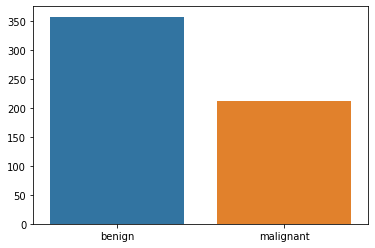

In [29]:
sns.barplot(label,table.values)
plt.show()

#### 1.2. Train and test:

In [8]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [30]:
# Train and predict.
#solver--> the algorithm that makes optimization 
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)                            # Out-of-sample prediction. 

C:\Users\Mohamed Elhaj-Abdou\Anaconda3-1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[139   5]
 [ 13  71]]


In [32]:
# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
print('Accuracy    = {}'.format(np.round(accuracy,3)))


Accuracy    = 0.921


In [33]:
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))


Sensitvity  = 0.845


In [34]:
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Specificity = {}'.format(np.round(specificity,3)))


Specificity = 0.965


In [35]:
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Precision   = {}'.format(np.round(precision,3)))

Precision   = 0.934


In [36]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.921
Sensitvity  = 0.845
Precision   = 0.934


#### 1.3. Cutoff (threshold):

In [37]:
# Now, predict the probability of Y  = 1.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]
Y_pred_test_prob

array([8.56980951e-02, 1.34623090e-04, 4.04320763e-02, 2.32534494e-02,
       2.36681617e-03, 5.75371079e-03, 9.03534759e-01, 2.16114568e-03,
       9.99999999e-01, 9.99961399e-01, 9.99999998e-01, 3.00925495e-02,
       4.82968766e-03, 5.30297010e-02, 2.85019945e-03, 9.99999999e-01,
       3.40199073e-04, 2.86960652e-03, 9.48148552e-04, 9.99990780e-01,
       5.26249447e-03, 9.89191504e-01, 9.99999998e-01, 1.00000000e+00,
       9.99999989e-01, 3.35617672e-01, 9.96218683e-01, 2.43932559e-03,
       2.09830371e-03, 2.31821096e-03, 1.29824013e-02, 1.26779011e-03,
       9.98536499e-01, 1.51453414e-02, 8.28815428e-02, 1.64119582e-02,
       1.19450269e-02, 9.85005874e-01, 8.81456253e-01, 1.66668401e-03,
       9.99941207e-01, 1.48793753e-02, 9.99999999e-01, 2.00062285e-01,
       9.12039483e-02, 2.68052864e-03, 3.92238372e-03, 1.27780704e-01,
       1.00000000e+00, 9.16034138e-02, 5.36139974e-02, 1.07313219e-02,
       3.30922290e-03, 9.99999964e-01, 4.91080263e-01, 4.51483944e-04,
      

In [15]:
# One can change the cutoff at will
cutoff = 0.7                                                      # cutoff can be a value between 0 and 1.
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[143   1]
 [ 13  71]]


In [16]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.939
Sensitvity  = 0.845
Specificity = 0.993
Precision   = 0.986


#### 1.4. ROC curve:

In [42]:
# Initialize.
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []                                                   # False Positive Rate.
cutoff_grid

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [18]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)                             

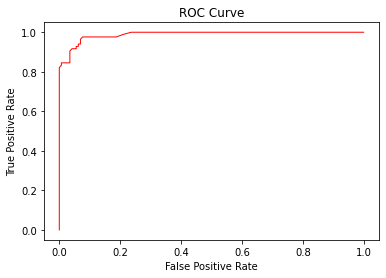

In [19]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### 1.5. ROC curve (sklearn):

In [20]:
# Calculate the TPR and FPR using a Scikit Learn function.
# pos_label--> the labels with positive examples
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

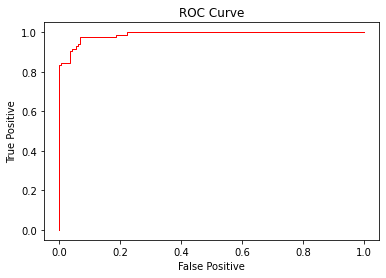

In [21]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [43]:
Y_pred_test_prob

array([8.56980951e-02, 1.34623090e-04, 4.04320763e-02, 2.32534494e-02,
       2.36681617e-03, 5.75371079e-03, 9.03534759e-01, 2.16114568e-03,
       9.99999999e-01, 9.99961399e-01, 9.99999998e-01, 3.00925495e-02,
       4.82968766e-03, 5.30297010e-02, 2.85019945e-03, 9.99999999e-01,
       3.40199073e-04, 2.86960652e-03, 9.48148552e-04, 9.99990780e-01,
       5.26249447e-03, 9.89191504e-01, 9.99999998e-01, 1.00000000e+00,
       9.99999989e-01, 3.35617672e-01, 9.96218683e-01, 2.43932559e-03,
       2.09830371e-03, 2.31821096e-03, 1.29824013e-02, 1.26779011e-03,
       9.98536499e-01, 1.51453414e-02, 8.28815428e-02, 1.64119582e-02,
       1.19450269e-02, 9.85005874e-01, 8.81456253e-01, 1.66668401e-03,
       9.99941207e-01, 1.48793753e-02, 9.99999999e-01, 2.00062285e-01,
       9.12039483e-02, 2.68052864e-03, 3.92238372e-03, 1.27780704e-01,
       1.00000000e+00, 9.16034138e-02, 5.36139974e-02, 1.07313219e-02,
       3.30922290e-03, 9.99999964e-01, 4.91080263e-01, 4.51483944e-04,
      

In [22]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989


In [ ]:
plot_roc_curve(model, X_test, y_test)